In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
# Step 1: Load the dataset
dataset = pd.read_csv(r"C:\Users\csaru\Downloads\titanic_dataset .csv")


In [24]:
dataset_description = dataset.describe()
print(dataset_description)

       PassengerId    Survived      Pclass           Age       SibSp  \
count   891.000000  891.000000  891.000000  8.910000e+02  891.000000   
mean    446.000000    0.383838    2.308642  3.841546e-16    0.523008   
std     257.353842    0.486592    0.836071  1.000562e+00    1.102743   
min       1.000000    0.000000    1.000000 -2.224156e+00    0.000000   
25%     223.500000    0.000000    2.000000 -5.657365e-01    0.000000   
50%     446.000000    0.000000    3.000000 -1.046374e-01    0.000000   
75%     668.500000    1.000000    3.000000  4.333115e-01    1.000000   
max     891.000000    1.000000    3.000000  3.891554e+00    8.000000   

            Parch          Fare    Sex_male  Embarked_Q  Embarked_S  
count  891.000000  8.910000e+02  891.000000  891.000000  891.000000  
mean     0.381594  7.999587e-17    0.647587    0.086420    0.722783  
std      0.806057  1.000562e+00    0.477990    0.281141    0.447876  
min      0.000000 -1.174727e+00    0.000000    0.000000    0.000000  
2

In [5]:
missing_values = dataset.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


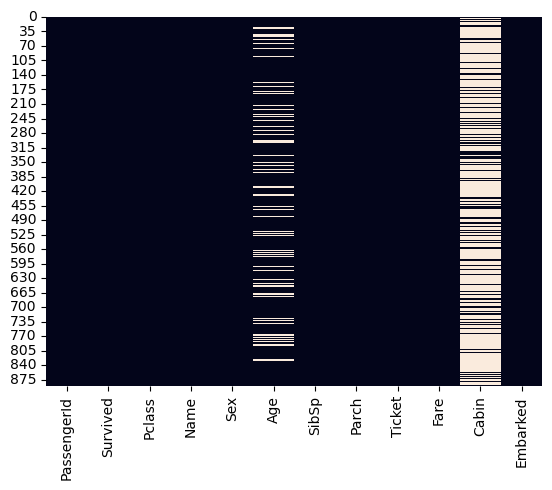

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(dataset.isnull(), cbar=False)
plt.show()

In [25]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [7]:
median_age = dataset['Age'].median()
dataset['Age'].fillna(median_age, inplace=True)

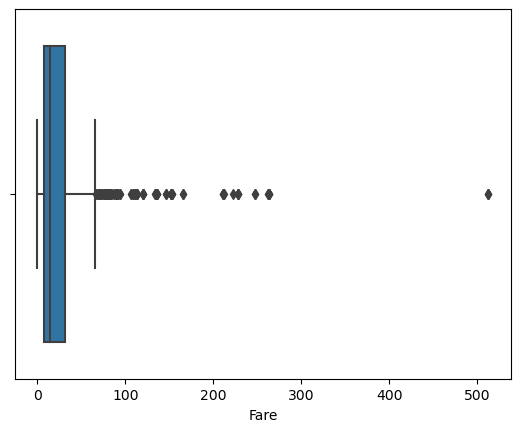

In [8]:
sns.boxplot(x=dataset['Fare'])
plt.show()

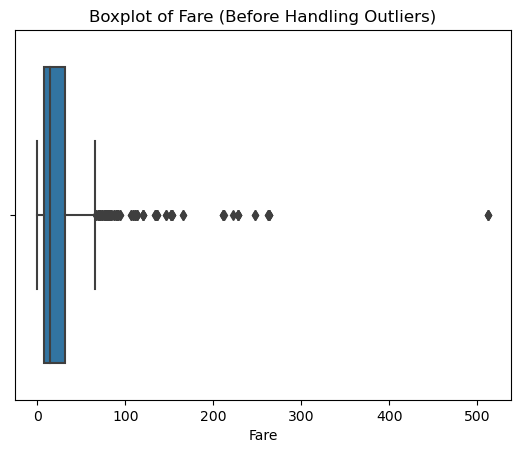

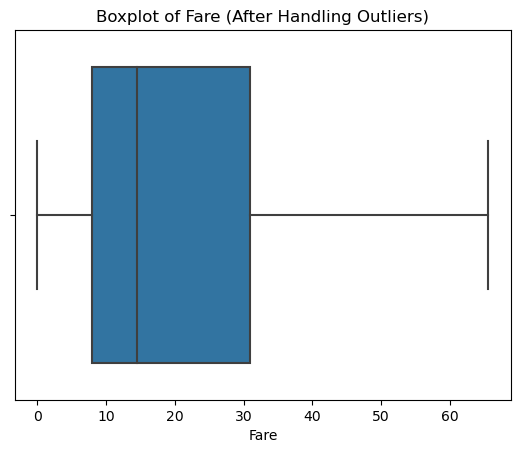

In [9]:
# Step 3: Identify and Handle Outliers
sns.boxplot(x=dataset['Fare'])
plt.title('Boxplot of Fare (Before Handling Outliers)')
plt.show()

Q1 = dataset['Fare'].quantile(0.25)
Q3 = dataset['Fare'].quantile(0.75)
IQR = Q3 - Q1
upper_whisker = Q3 + 1.5 * IQR

dataset.loc[dataset['Fare'] > upper_whisker, 'Fare'] = upper_whisker

sns.boxplot(x=dataset['Fare'])
plt.title('Boxplot of Fare (After Handling Outliers)')
plt.show()

In [10]:
missing_values = dataset.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
#  Handle Missing Values cabin
dataset.drop('Cabin', axis=1, inplace=True)
dataset['Age'].fillna(dataset['Age'].median(), inplace=True)

In [12]:
missing_values = dataset.isnull().sum()
print(missing_values)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [13]:
# Step 4: Encode Categorical Variables
categorical_cols = ['Sex', 'Embarked']
dataset = pd.get_dummies(dataset, columns=categorical_cols, drop_first=True)

In [14]:
# Step 5: Feature Scaling
scaler = StandardScaler()
dataset[['Age', 'Fare']] = scaler.fit_transform(dataset[['Age', 'Fare']])


In [21]:
# Split the dataset into features (X) and target (y)
X = dataset.drop('Survived', axis=1)
y = dataset['Survived']



In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the kNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

In [26]:
dataset

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",-0.565736,1,0,A/5 21171,-0.820552,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.663861,1,0,PC 17599,2.031623,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",-0.258337,0,0,STON/O2. 3101282,-0.787578,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.433312,1,0,113803,1.419297,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0.433312,0,0,373450,-0.781471,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",-0.181487,0,0,211536,-0.539655,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",-0.796286,0,0,112053,0.290823,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",-0.104637,1,2,W./C. 6607,-0.029155,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",-0.258337,0,0,111369,0.290823,1,0,0


In [27]:
# Iterate over the columns and check for non-numeric values
non_numeric_columns = []
for column in dataset.columns:
    if dataset[column].dtype == 'object':
        try:
            pd.to_numeric(dataset[column])
        except ValueError:
            non_numeric_columns.append(column)

print("Columns with non-numeric values:")
print(non_numeric_columns)

Columns with non-numeric values:
['Name', 'Ticket']


In [36]:
# Handle the column with string values
dataset['Ticket'] = dataset['Ticket'].fillna('Unknown')  # Fill missing values with 'Unknown'

# Encode the string column to numeric values
label_encoder = LabelEncoder()
dataset['Ticket'] = label_encoder.fit_transform(dataset['Ticket'])

# Handle the column with string values
dataset['Name'] = dataset['Name'].fillna('Unknown')  # Fill missing values with 'Unknown'

# Encode the string column to numeric values
label_encoder = LabelEncoder()
dataset['Name'] = label_encoder.fit_transform(dataset['Name'])



In [40]:
# Find the row that contains the string value
row_with_error = dataset[dataset.applymap(lambda x: isinstance(x, str) and 'Partner, Mr. Austen' in x).any(axis=1)]

# Print the row with the error
print(row_with_error)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Age, SibSp, Parch, Ticket, Fare, Sex_male, Embarked_Q, Embarked_S]
Index: []


In [42]:
# Check the data types of the columns
print(dataset.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name             int32
Age            float64
SibSp            int64
Parch            int64
Ticket           int64
Fare           float64
Sex_male         uint8
Embarked_Q       uint8
Embarked_S       uint8
dtype: object


In [43]:
from sklearn.preprocessing import LabelEncoder


# Create a label encoder object
label_encoder = LabelEncoder()

# Encode the 'Name' column
dataset['Name'] = label_encoder.fit_transform(dataset['Name'])

# Print the updated dataset
print(dataset.head())

   PassengerId  Survived  Pclass  Name       Age  SibSp  Parch  Ticket  \
0            1         0       3   108 -0.565736      1      0     523   
1            2         1       1   190  0.663861      1      0     596   
2            3         1       3   353 -0.258337      0      0     669   
3            4         1       1   272  0.433312      1      0      49   
4            5         0       3    15  0.433312      0      0     472   

       Fare  Sex_male  Embarked_Q  Embarked_S  
0 -0.820552         1           0           1  
1  2.031623         0           0           0  
2 -0.787578         0           0           1  
3  1.419297         0           0           1  
4 -0.781471         1           0           1  


In [45]:
# Separate the features and target variable
X = dataset.drop('Survived', axis=1)
y = dataset['Survived']



In [47]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [48]:
# Create and train the kNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)



KNeighborsClassifier()

In [49]:
# Make predictions on the test set using kNN
knn_predictions = knn.predict(X_test)



C:\Users\csaru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [50]:
# Calculate accuracy score for kNN
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("kNN Accuracy:", knn_accuracy)

kNN Accuracy: 0.6256983240223464


In [53]:
# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [54]:
# Create and train the kNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [55]:
# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("kNN Accuracy:", accuracy)

kNN Accuracy: 0.8212290502793296


C:\Users\csaru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [57]:
# Create and train the SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the test set using SVM
svm_predictions = svm.predict(X_test)

# Calculate accuracy score for SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.6089385474860335


In [59]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm = SVC(random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Train SVM with best hyperparameters
best_svm = grid_search.best_estimator_
best_svm.fit(X_train_scaled, y_train)

# Make predictions
y_pred = best_svm.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)

SVM Accuracy: 0.8100558659217877


In [60]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Perform k-fold cross-validation for kNN model
knn_scores = cross_val_score(knn, X, y, cv=10)
knn_avg_accuracy = knn_scores.mean()
print("kNN Average Accuracy:", knn_avg_accuracy)

kNN Average Accuracy: 0.620661672908864


C:\Users\csaru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\csaru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [62]:
from sklearn.preprocessing import StandardScaler

# Scale the feature matrix X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform stratified k-fold cross-validation for SVM model
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
svm_scores = cross_val_score(best_svm, X_scaled, y, cv=skf)
svm_avg_accuracy = svm_scores.mean()
print("SVM Average Accuracy:", svm_avg_accuracy)

SVM Average Accuracy: 0.821485642946317


In [63]:
if knn_avg_accuracy > svm_avg_accuracy:
    print("kNN model performs better.")
else:
    print("SVM model performs better.")


SVM model performs better.
